In [1]:
import pandas

df = pandas.read_csv('../dataset/sanatized.csv')
goal = 'PT08.S1(CO)'
df

,PT08.S1(CO),T,RH,AH
0,1360,13.6,48.9,0.7578
1,1292,13.3,47.7,0.7255
2,1402,11.9,54.0,0.7502
3,1376,11.0,60.0,0.7867
4,1272,11.2,59.6,0.7888
...,...,...,...,...
8986,1314,21.9,29.3,0.7568
8987,1163,24.3,23.7,0.7119
8988,1142,26.9,18.3,0.6406
8989,1003,28.3,13.5,0.5139


In [3]:
from sklearn import svm

# model = svm.SVR(C=1.0, epsilon=0.2)
model = svm.SVR(C=100)

In [4]:
import numpy as np

x = []
y = []
for i in range(48, len(df) - 1):
    x.append(df[goal][i - 48:i])
    y.append(df[goal][i])
x, y = np.array(x), np.array(y)
x, y

(array([[1360, 1292, 1402, ..., 1353, 1309, 1274],
        [1292, 1402, 1376, ..., 1309, 1274, 1510],
        [1402, 1376, 1272, ..., 1274, 1510, 1525],
        ...,
        [ 877,  867,  892, ..., 1446, 1297, 1314],
        [ 867,  892,  889, ..., 1297, 1314, 1163],
        [ 892,  889,  900, ..., 1314, 1163, 1142]]),
 array([1510, 1525, 1843, ..., 1163, 1142, 1003]))

In [5]:
x.shape, y.shape

((8942, 48), (8942,))

In [6]:
model.fit(x, y)

SVR(C=100)

In [7]:
from sklearn import metrics
rmse = metrics.mean_squared_error(model.predict(x), y) ** 0.5
rmse

71.05565874921373

In [8]:
rmse / (df[goal].max() - df[goal].min())

0.05100908740072774

In [9]:
from sklearn import multioutput

model = multioutput.MultiOutputRegressor(svm.SVR(C=2000))

In [10]:
x = []
y = []
for i in range(48, len(df) - 24, 24):
    x.append(df[goal][i - 48:i])
    y.append(df[goal][i:i + 24])
x, y = np.array(x), np.array(y)
x, y

(array([[1360, 1292, 1402, ..., 1353, 1309, 1274],
        [1581, 1776, 1640, ..., 1240, 1306, 1326],
        [1510, 1525, 1843, ..., 1258, 1458, 1438],
        ...,
        [1024,  938,  905, ...,  895,  886,  886],
        [1013,  998,  923, ...,  823,  835,  893],
        [ 848,  818,  848, ...,  885,  891,  904]]),
 array([[1510, 1525, 1843, ..., 1240, 1306, 1326],
        [1473, 1609, 1611, ..., 1258, 1458, 1438],
        [1478, 1808, 1898, ..., 1317, 1318, 1445],
        ...,
        [ 848,  818,  848, ...,  823,  835,  893],
        [ 965,  838,  835, ...,  885,  891,  904],
        [ 929,  951,  938, ..., 1102, 1116, 1100]]))

In [11]:
x.shape, y.shape

((372, 48), (372, 24))

In [12]:
model.fit(x, y)

MultiOutputRegressor(estimator=SVR(C=2000))

In [13]:
from sklearn import metrics
prediction = model.predict(x)
metrics.mean_squared_error(prediction, y) ** 0.5

46.38141525843769

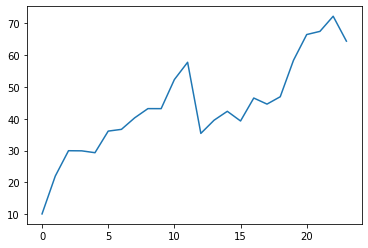

In [14]:
from matplotlib import pyplot as plt
plt.plot(metrics.mean_squared_error(prediction, y, multioutput="raw_values") ** 0.5)